In [1]:
import h5py
import numpy as np
from datetime import datetime
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, GRU, Dense, Reshape, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
with h5py.File('/Users/rcyerramsetti/Desktop/Semester-2/Cyberinfra competition/Data/TrainingData.h5', 'r') as f:
    
    traffic_data = f['trip'][()]
    dates = f['timeslot'][()]

In [3]:
formatted_dates = []

for date_string in dates:
    formatted_date = datetime.strptime(date_string.decode(), '%Y%m%d%H%M')

    year = formatted_date.year
    month = formatted_date.month
    day = formatted_date.day
    hour = formatted_date.hour
    minute = formatted_date.minute

    formatted_dates.append(np.array([year, month, day, hour, minute]))

formatted_dates = np.array(formatted_dates).reshape(1488, 5, 1)

In [4]:
formatted_dates[0]

array([[2019],
       [  10],
       [   1],
       [   0],
       [  30]])

In [27]:
test_size = 240

train_traffic_data = traffic_data[:-test_size]
test_traffic_data = traffic_data[-test_size:]

train_formatted_dates = formatted_dates[:-test_size]
test_formatted_dates = formatted_dates[-test_size:]

In [28]:
train_formatted_dates[0]

array([[2019],
       [  10],
       [   1],
       [   0],
       [  30]])

In [29]:
X_train, X_test = train_formatted_dates, test_formatted_dates
y_train, y_test = train_traffic_data, test_traffic_data


In [30]:
model = Sequential()


model.add(GRU(50, activation='relu', input_shape=(5, 1))) 
model.add(Dropout(0.2))
model.add(Dense(2 * 16 * 8, activation='linear'))
model.add(Reshape((2, 16, 8)))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('GRU_init_model.keras', monitor='val_loss', save_best_only=True)


In [31]:
model.fit(X_train, y_train, epochs=50, batch_size=44, validation_data=(X_test, y_test))

Epoch 1/50
29/29 [==============================] - 1s 7ms/step - loss: 679.1400 - val_loss: 187.3797
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 218.1864 - val_loss: 96.8991
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 150.1664 - val_loss: 84.8685
Epoch 4/50
29/29 [==============================] - 0s 3ms/step - loss: 130.0422 - val_loss: 74.0063
Epoch 5/50
29/29 [==============================] - 0s 3ms/step - loss: 116.4035 - val_loss: 72.8291
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 105.1732 - val_loss: 69.7071
Epoch 7/50
29/29 [==============================] - 0s 4ms/step - loss: 99.3133 - val_loss: 82.9835
Epoch 8/50
29/29 [==============================] - 0s 4ms/step - loss: 94.1830 - val_loss: 72.5644
Epoch 9/50
29/29 [==============================] - 0s 3ms/step - loss: 92.9631 - val_loss: 63.2385
Epoch 10/50
29/29 [==============================] - 0s 3ms/step - loss: 85.8853 - val_loss: 

In [32]:
mse = model.evaluate(X_test, y_test)


rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

8/8 [==============================] - 0s 1ms/step - loss: 60.5151
Root Mean Squared Error: 7.779144860270959


In [33]:
model.save('GRU_model.keras')

In [34]:
new_model = load_model('GRU_model.keras')

mse = new_model.evaluate(X_test, y_test)


rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

8/8 [==============================] - 0s 1ms/step - loss: 60.5151
Root Mean Squared Error: 7.779144860270959


In [26]:
y_pred = model.predict(x=X_test)
y_pred.shape
#print(y_pred[0], y_test[0])

6/6 [==============================] - 0s 973us/step


(172, 2, 16, 8)

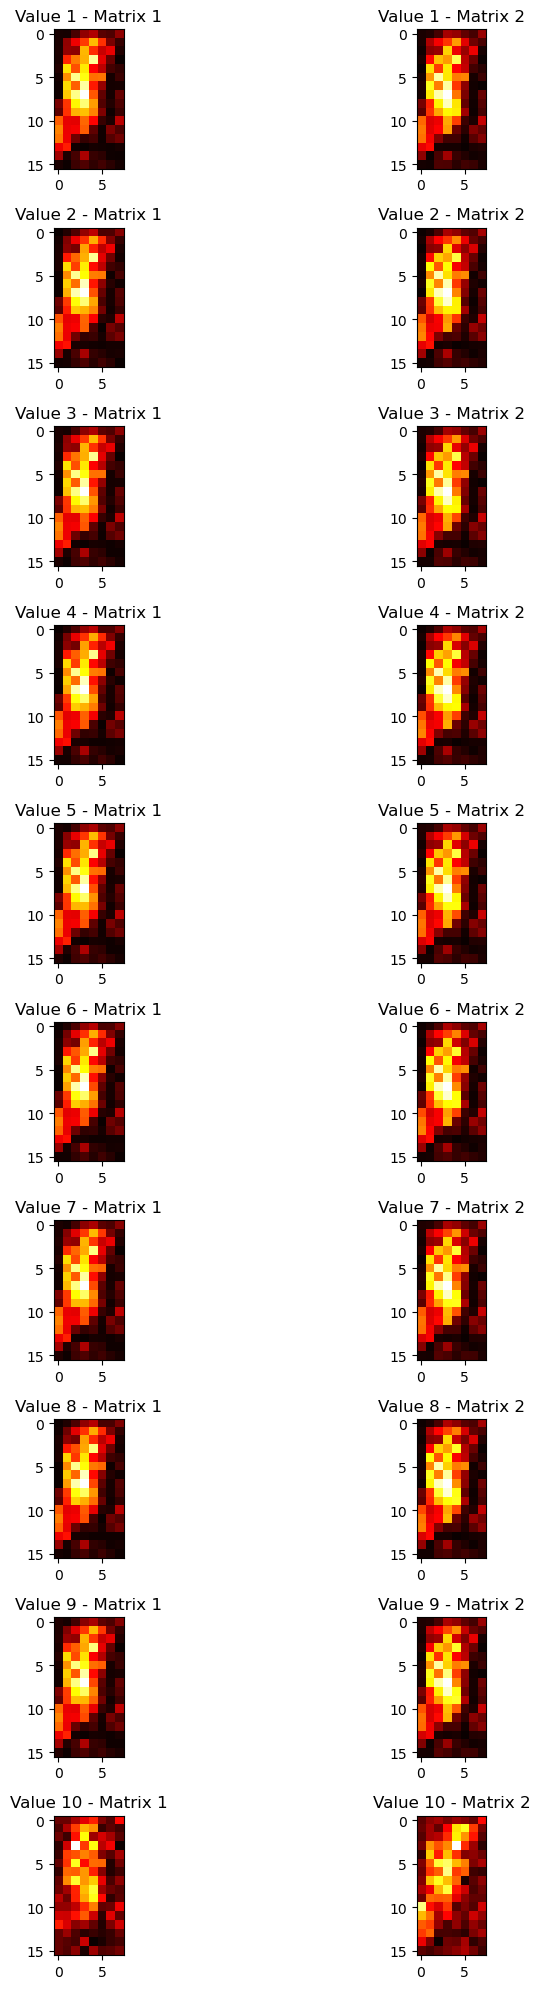

In [14]:
import matplotlib.pyplot as plt
import numpy as np  

data = y_pred[:10]  
fig, axs = plt.subplots(len(data), 2, figsize=(10, 2 * len(data)))

for i, (matrix1, matrix2) in enumerate(data):
    if len(data) == 1:
        ax1, ax2 = axs
    else:
        ax1, ax2 = axs[i, 0], axs[i, 1]
    ax1.imshow(matrix1, cmap='hot', interpolation='nearest')
    ax1.set_title(f'Value {i+1} - Matrix 1')
    ax2.imshow(matrix2, cmap='hot', interpolation='nearest')
    ax2.set_title(f'Value {i+1} - Matrix 2')
plt.tight_layout()
plt.show()


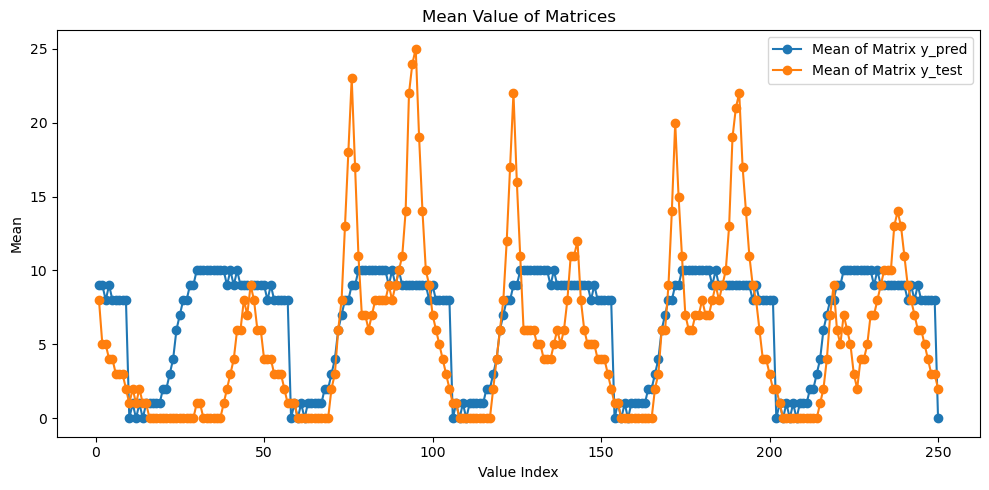

In [15]:
import matplotlib.pyplot as plt
import numpy as np

data = y_pred  
data1=y_test
mean_values1 = [int(np.mean(matrix1)) for matrix1,matrix2 in data]
mean_values2 = [int(np.mean(matrix1)) for matrix1,matrix2 in data1]
x_values = range(1, len(data) + 1)
plt.figure(figsize=(10, 5))
plt.plot(x_values, mean_values1, label='Mean of Matrix y_pred', marker='o')
plt.plot(x_values, mean_values2, label='Mean of Matrix y_test', marker='o')
plt.title('Mean Value of Matrices')
plt.xlabel('Value Index')
plt.ylabel('Mean')
plt.legend()
plt.tight_layout()
plt.show()


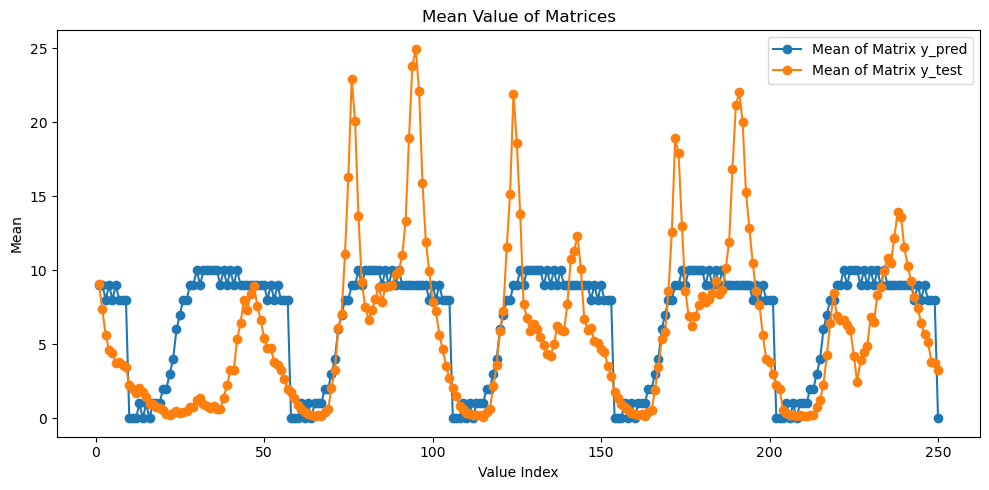

In [16]:
import matplotlib.pyplot as plt
import numpy as np

data = y_pred  # Adjust the number here to select the first N values you want to plot
data1=y_test
# Calculate statistics for each matrix pair
mean_values1 = [int(np.mean(matrix2)) for matrix1, matrix2 in data]
mean_values2 = [np.mean(matrix2) for matrix1, matrix2 in data1]
#print(mean_values1,mean_values2)
# Create a range of indices for the x-axis
x_values = range(1, len(data) + 1)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the mean of the first matrix in each pair
plt.plot(x_values, mean_values1, label='Mean of Matrix y_pred', marker='o')

# Plot the mean of the second matrix in each pair
plt.plot(x_values, mean_values2, label='Mean of Matrix y_test', marker='o')

# Add title and labels
plt.title('Mean Value of Matrices')
plt.xlabel('Value Index')
plt.ylabel('Mean')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
for matrix1,matrix2 in data:
    #print(matrix1)
    print(matrix1.shape)

(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
(16, 8)
